# 군집

군집(Clustering) 분석은 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터(집단)으로 묶는 알고리즘이다. 다른 클러스터 간에는 서로 완전하게 구분되는 특징을 갖기 때문에 어느 클러스터에도 속하지 못하는 관측값이 존재할 수 있다. 이런 특성을 이용하여 특이 데이터(이상값, 중복값 등)를 찾는데 활용하기도 한다.

한편 군집 분석은 비지도학습 유형이다. 관측값을 몇 개의 집단으로 나눈다는 점에서 분류 알고리즘과 비슷하지만 군집 분석은 정답이 없는 상태에서 데이터 자체를 유사성만을 기준으로 판단하는 점에서 정답을 알고 있는 상태에서 학습 과정을 거치는 분류 알고리즘과 차이가 있다.

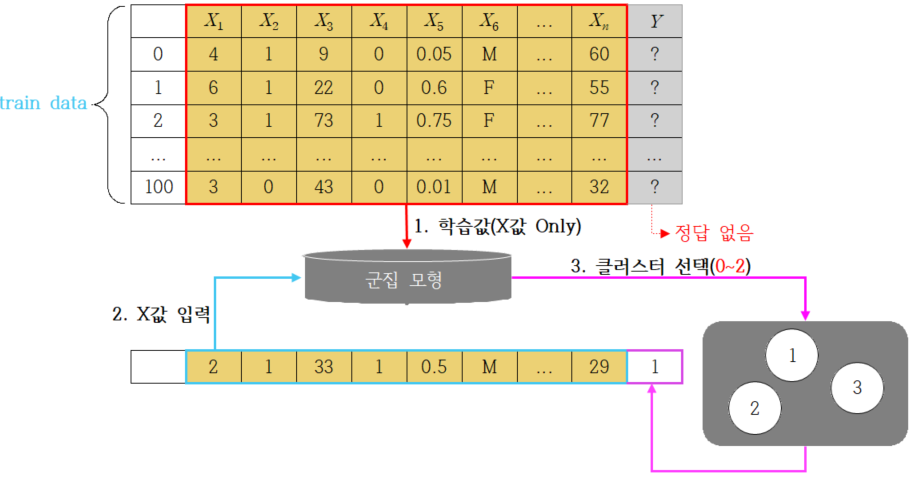



군집 알고리즘은 신용카드 부정 사용 탐지, 구매 패턴 분석 등 소비자 행동 특성을 그룹화하는데 사용된다. 어떤 소비자와 유사한 특성을 갖는 집단을 구분하게 되면, 같은 집단 내의 다른 소비자를 통해 새로운 소비자의 구매 패턴이나 행동 등을 예측하는데 활용할 수 있다. 여러 가지 알고리즘이 존재하는데, k-Means 알고리즘과 DBSCAN 알고리즘에 대해 공부할 것이다.

* k-Means

k-Means 알고리즘은 데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용한다. 벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주어졌을 때 클러스터의 중심까지의 거리가 가장 가까운 클러스터로 해당 데이터를 할당한다. 다른 클러스터 간에는 서로 다른 완전하게 구분하기 위하여 일정한 거리 이상 떨어져야 한다. 

한편 몇 개의 클러스터로 데이터를 구분할 것인지를 결한하는 k 값에 따라 성능이 달라진다. 일반적으로 k가 클수록 모형의 정확도는 개선되지만, k값이 너무 커지면 선택지가 너무 많아지므로 분석의 효과는 사라진다.

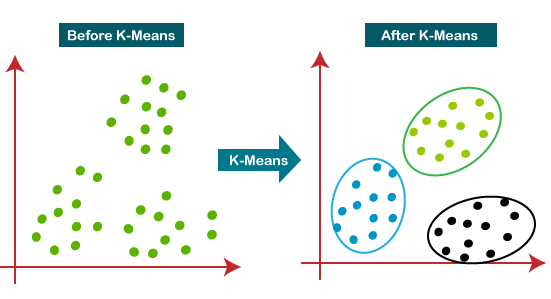

#### 데이터 준비 / 데이터 탐색

UCI 머신러닝 저장소에서 제공하는 도매업 고개(wholesale customers) 데이터셋을 사용한다. 각 고객의 연간 구매금액을 상품 카테고리별로 구분하여 정리한 데이터이다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

# 데이터 살펴보기
print(df.head())
print()

# 데이터 자료형 확인
print(df.info())
print()

# 데이터 통계 요약 정보 확인
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen 

In [2]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

모두 8개의 열에 440개의 관측값이 행으로 구현된다. 첫 2개 열은 상품 구매금액이 아니라 고객의 일반 정보를 가지고 있다. 'Channel' 열은 호텔/레스토랑 또는 소매업 등 판매채널 값이고, 'Region' 열은 고객 소재지를 나타낸다.

데이터프레임 전체를 모형의 학습 데이터로 사용한다. 비지도 학습 모형이므로 예측 변수를 지정할 필요가 없고 필요한 속성을 모두 독립 변수로 활용한다.

StandardScaler() 함수 등을 이용하여 학습 데이터를 정규화하면 모형 학습을 위한 준비가 끝난다. 이를 통해 서로 다른 변수 사이에 존재할 수 있는 데이터 값의 상대적 크기 차이에서 발생하는 오류를 제거한다.

#### 데이터 전처리

In [3]:
# 분석에 사용할 속성으로 모두 선택
X = df.iloc[:, :]
print(X.head(5))
print('\n')

# 독립 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


#### 모형 학습 및 검증

sklearn 라이브러리의 cluster 모듈을 활용한다. KMeans() 함수로 모형 객체를 생성하는데, n_clusters 옵션을 사용하여 클러스터의 개수를 5개로 지정한다. 위에서 선택한 학습 데이터를 fit() 메소드에 전달하고 모형에 적용하면 모형은 스스로 학습하여 설정한 클러스터 개수만큼 데이터를 구분한다. 모형의 labels_ 속성에 구분한 클러스터 값이 입력된다.

In [4]:
from sklearn import cluster

# 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)

# 예측(군집)
cluster_label = kmeans.labels_

print(cluster_label)

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 4 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 2 0 0 1 1 0 0 1 1 2 0 1 1 0 2 0 0 1 2 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 2 2 1 1 1 1 1 2 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 4 1 4 1
 1 1 1 0 0 1 1 1 0 1 1 3 0 3 3 0 0 3 3 3 0 3 3 3 0 3 2 3 3 0 3 0 3 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 0 3 0 3 0 3 3 3 3 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 3 0
 3 0 0 3 0 0 0 0 0 0 0 3 3 0 3 3 0 3 3 0 3 3 3 0 3 3 3 3 3 4 3 3 3 3 3 0 3
 2 3 0 3 3 3 3 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


cluster_label에 클러스터 값을 저장하여 출력한 결과를 보면, 0~4 범위의 5개의 클러스터가 확인된다. 

이제 'Cluster' 열에 모형이 예측한 클러스터 값을 입력하고, 원본 데이터프레임에 새로운 열로 추가한다. 각 데이터가 모형에 의해 어떤 클러스터에 할당되었는지 한눈에 볼 수 있다. (단, 매번 실행할 때마다 예측값의 결과가 달라지는 점을 유의!)

In [5]:
#  예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

   Channel  Region  Fresh  Milk  ...  Frozen  Detergents_Paper  Delicassen  Cluster
0        2       3  12669  9656  ...     214              2674        1338        0
1        2       3   7057  9810  ...    1762              3293        1776        0
2        2       3   6353  8808  ...    2405              3516        7844        0
3        1       3  13265  1196  ...    6404               507        1788        1
4        2       3  22615  5410  ...    3915              1777        5185        0

[5 rows x 9 columns]


모형은 8개의 속성(변수)을 이용하여 각 관측값을 5개의 클러스터로 구분한다. 8개의 변수를 하나의 그래프로 표현할 수 없기 때문에 2개의 변수를 선택하여 관측값의 분포를 그려보자.

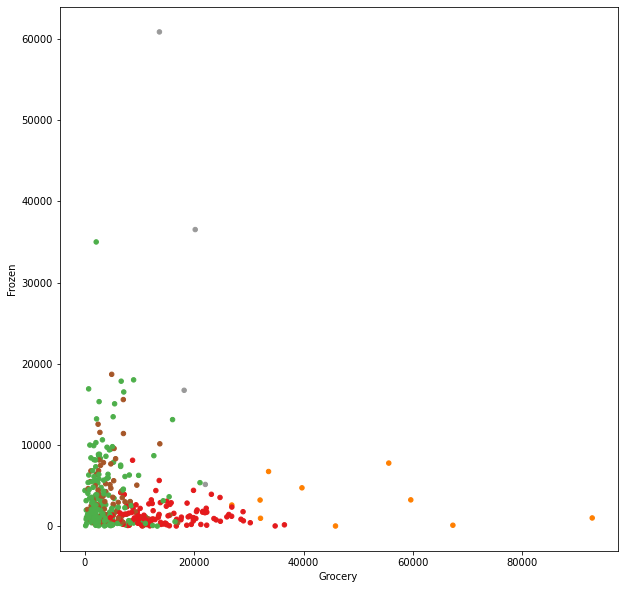

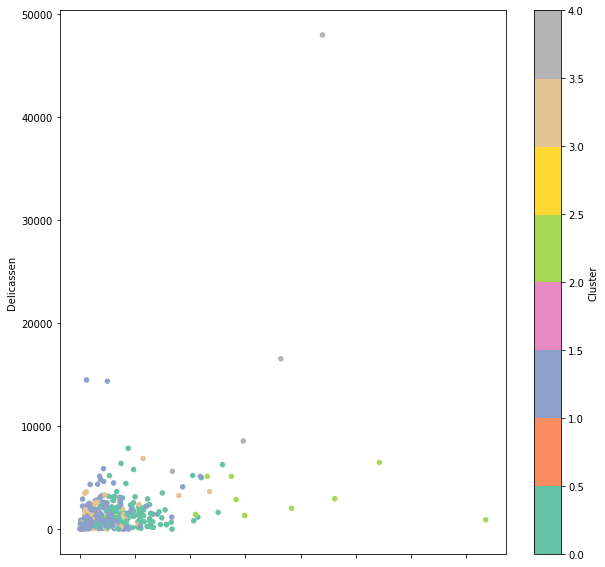

In [6]:
# 그래프 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10,10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set2', colorbar=True, figsize=(10,10))
plt.show()
plt.close()

다른 값들에 비해 지나치게 큰 값으로 구성되는 클러스터에 속하는 값들을 제외하고 다시 그러본다. 데이터들이 몰려있는 구간을 확대해서 자세하게 파악할 수 있다. 클러스터 라벨이 0, 4인 데이터를 제외하고 클러터 1, 2, 3에 속하는 데이터만을 변수 ndf에 저장한다. 그리고 다시 그래프를 그려 분포를 확인하자.

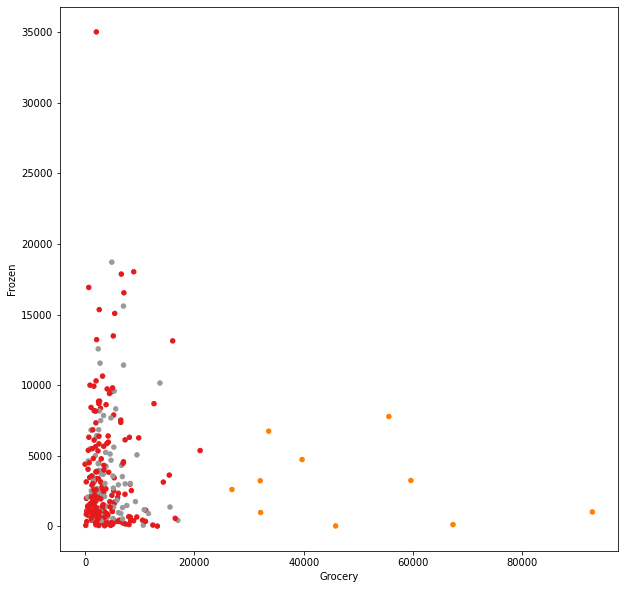

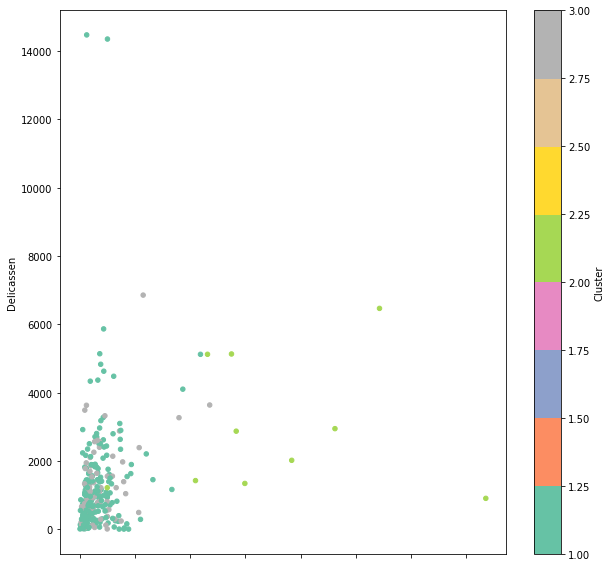

In [7]:
# 큰 값으로 구성된 클러스터(0, 4) 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set2', colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

* DBSCAN

DBSCAN(Density-Based Spatial Clustering of Applications with Noise)은 이름에서 알 수 있듯이 데이터가 위치하고 있는 공간 밀집도를 기준으로 클러스터를 구분한다. 자기를 중심으로 반지름 R의 공간에 최소 M개의 포인트가 존재하는 점을 코어 포인트(core point)라고 부른다. 코어 포인트는 아니지만 반지름 R 안에 다른 코어 포인트가 있을 경우 경계 포인트(border point)라고 한다. 코어 포인트도 아니고 경계 포인트에도 속하지 않는 점을 Noise(또는 Outlier)라고 분류한다.

하나의 클러스터는 반지름 R 안에 서로 위치하는 모든 코어 포인트를 포함하는 방식으로 구성된다. 당연히 각 코어 포인트 주위에 있는 경계 포인트를 포함한다. 서로 밀접한 데이터끼리 하나의 클러스터를 구성하게 되고 어느 클러스터에도 속하지 않는 점들을 Noise로 남게 된다.

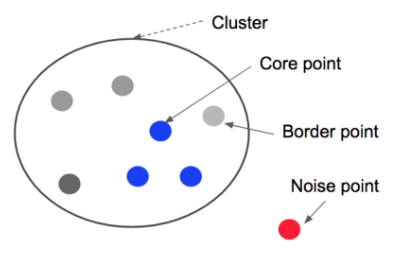

#### 데이터 준비

학교알리미 공개용 데이터 중에서 서울시 중학교 졸업생의 진로현황 데이터셋을 정리해서 사용하자. 고등학교 진학률 데이터를 활용하여 속성이 비슷한 중학교끼리 클러스터를 만든다.

In [8]:
import pandas as pd
import folium

# 서울시내 중학교 진학률 데이터셋
file_path = '경로/2016_middle_shcool_graduates_report.xlsx'

df = pd.read_excel(file_path, header=0, engine='openpyxl')

# IPython Console 디스플레이 옵션 설정하기
pd.set_option('display.width', None)        # 출력화면의 너비
pd.set_option('display.max_rows', 100)      # 출력할 행의 개수 한도
pd.set_option('display.max_columns', 10)    # 출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20)   # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

for i in range(len(df.columns.values)):
    print(i, '번 : ', df.columns.values[i])

0 번 :  Unnamed: 0
1 번 :  지역
2 번 :  학교명
3 번 :  코드
4 번 :  유형
5 번 :  주야
6 번 :  남학생수
7 번 :  여학생수
8 번 :  일반고
9 번 :  특성화고
10 번 :  과학고
11 번 :  외고_국제고
12 번 :  예고_체고
13 번 :  마이스터고
14 번 :  자사고
15 번 :  자공고
16 번 :  기타진학
17 번 :  취업
18 번 :  미상
19 번 :  위도
20 번 :  경도


#### 데이터 탐색

In [9]:
print(df.head())
print('\n')

print(df.info())
print('\n')

print(df.describe())
print('\n')

   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

  기타진학  취업   미상       위도        경도  
0    0.004     0  0.000  37.594942  127.038909  
1    0.031     0  0.000  37.577473  127.003857  
2    0.009     0  0.003  37.491637  127.071744  
3    0.019     0  0.000  37.480439  127.062201  
4    0.010     0  0.000  37.510750  127.008900  

[5 rows x 21 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-nul

각 중학교의 위치 데이터를 나타내는 '위도'열과 '경도'열을 foliumn.CircleMarker() 함수에 전달하면 각 위치를 지도에 원형 마커로 표시한다. '학교명' 열을 popup 옵션에 할당하여 원형 마커를 클릭할 때마다 학교명이 팝업으로 표시되도록 설정한다.

In [10]:
# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

# 중학교 위치 정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=5,               # 원의 반지름
                        color='brown',          # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',     # 원을 채우는 색
                        fill_opacity=0.7,       # 투명도
                        popup=name).add_to(mschool_map)

mschool_map

# 지도를 html 파일로 저장하기
# mschool_map.save('./seoul_mschool_location.html')

데이터프레임의 열 데이터 중에서 모형이 인식할 수 없는 문자열 데이터를 더미 변수로 변환한다. '지역', '코드', '유형', '주야' 열을 원핫인코딩으로 변환하여 'location', 'code', 'type', 'day' 열에 저장하고 데이터프레임에 추가한다. 숫자형 데이터로 변환되는 것을 확인할 수 있다.

#### 데이터 전처리

In [11]:
# 원핫인코딩(더비 변수)
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder() # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day']= onehot_day

df.head()

,Unnamed: 0,지역,학교명,코드,유형,...,경도,location,code,type,day
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,127.038909,16,0,1,0
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,127.003857,22,0,1,0
2,2,강남구,개원중학교,3,공립,...,127.071744,0,0,0,0
3,3,강남구,개포중학교,3,공립,...,127.062201,0,0,0,0
4,4,서초구,경원중학교,3,공립,...,127.008900,14,0,0,0


#### 모형 학습 및 검증

먼저 '과학고', '외국_국제고', '자사고' 열을 선택하여 설명 변수 X로 할당한다. 이외에 다른 속성을 포함할 수도 있다. 그리고 StandardScaler() 메소드로 정규화 처리하고 cluster 모듈의 DBSCAN() 함수를 적용하여 모형 객체(dbm)를 생성한다. 밀도 계산의 기준이 되는 반지름 R(eps=0.2)과 최소 포인트 개수 M(min_samples=5)을 옵션에 설정한다. fit() 메소드를 이용하여 학습 데이터를 dbm 모형에 전달하면 모형은 데이터를 여러 개의 클러스터로 구분한다.



In [12]:
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 분석에 사용할 속성 선택(과학고, 외국국제고, 자사고 진학률)
columns_list = [10, 11, 14]
X = df.iloc[:, columns_list]
print(X[:5])
print()

# 설명 변수 데이터 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm.fit(X)

# 예측(군집)
cluster_label = dbm.labels_
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

   과학고  외고_국제고  자사고
0   0.018        0.007   0.227
1   0.000        0.035   0.043
2   0.009        0.012   0.090
3   0.013        0.013   0.065
4   0.007        0.010   0.282

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  2 -1  0 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0
 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1
 -1 -1  0 -1 -1 -1  0  2  0  0  0  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1 -1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1
 -1  0  2  0 -1 -1  1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1  0 -1 -1 -1  1  0  3  1 -1  0  0 -1  0 -1 -1  0  0  2 -1 -1  3
  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  3  0  2 -1 -1
 -1 -1  0 -1 -1 -1  0

모형의 labels_ 속성을 확인하면 -1, 0, 1, 2, 3의 5개 값이 확인된다. -1은 Noise를 나타내므로 모형이 구분한 클러스터는 Noise를 제외한 0, 1, 2, 3으로 모두 4개가 된다. 'Cluster' 열에 모형이 분류한 클러스터 값을 입력하고, 데이터프레임에 새로운 열을 추가한다.

groupby() 메소드를 사용하여 'Cluster' 열을 기준으로 데이터프레임을 그룹 객체로 변환한다. 반복문을 사용하여 각 그룹별 내용을 출력하여 확인한다. 지도에 다른 색으로 구분하여 그룹별 분포를 살펴보자

In [13]:
# 클러스터 값으로 그룹화하고 그룹별로 내용 출력
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))
    print(group.iloc[:, grouped_cols].head())
    print('\n')

* key : -1
* number : 255
   Unnamed: 0    지역  코드  과학고  외고_국제고  자사고
0           0  성북구     3   0.018        0.007   0.227
1           1  종로구     3   0.000        0.035   0.043
2           2  강남구     3   0.009        0.012   0.090
3           3  강남구     3   0.013        0.013   0.065
4           4  서초구     3   0.007        0.010   0.282


* key : 0
* number : 102
    Unnamed: 0    지역  코드  과학고  외고_국제고  자사고
13          13  서초구     3     0.0        0.022   0.038
22          22  강남구     3     0.0        0.019   0.044
28          28  서초구     3     0.0        0.015   0.050
34          34  강남구     3     0.0        0.016   0.065
43          43  송파구     3     0.0        0.021   0.054


* key : 1
* number : 45
     Unnamed: 0      지역  코드  과학고  외고_국제고  자사고
46           46    강동구     3     0.0          0.0   0.044
103         103    양천구     3     0.0          0.0   0.006
118         118    구로구     3     0.0          0.0   0.012
126         126  영등포구     3     0.0          0.0   0.050
175         17

Noise(-1)의 경우 회색('gray')으로 설정한다. Noise가 255개이고, 각 클러스터에 속하는 포인트의 개수는 클러스터 0부터 순서대로 102, 45, 8, 5개이다. +

클러스터 0은 외고(국제고)와 자사고 합격률은 높지만 과학고 합격자가 없다.

클러스터 1은 자사고 합격자만 존재하고, 클러스터 2는 자사고 합격률은 매우 높으면서 과학고와 외고_국제고 합격자도 일부 존재한다. 클러스터 3은 과학고 합격자 없이 외고_국제고와 자사고 합격자를 배출한 점이 클러스터 0과 비슷하지만 외고_국제고 합격률이 클러스터 0에 비해 현저히 낮다.

In [14]:
# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan', 11:'tan'}

cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):
    folium.CircleMarker([lat, lng],
                        radius=5,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opcity=0.7,
                        popup=name).add_to(cluster_map)

cluster_map
# cluster_map.save('./seoul_mschool_cluster.html')

앞에서 사용한 속성에 학교 설립 유형(국립, 공립, 사립)을 추가하여 분석한다. 'type' 열에 원핫벡터 형태로 정리된 값을 사용한다. 순서로는 23번째 열이다.

0부터 10까지 모두 11개의 클러스터로 구분된다.

In [15]:
for i in range(len(df.columns.values)):
    print(i, '번 : ', df.columns.values[i])

0 번 :  Unnamed: 0
1 번 :  지역
2 번 :  학교명
3 번 :  코드
4 번 :  유형
5 번 :  주야
6 번 :  남학생수
7 번 :  여학생수
8 번 :  일반고
9 번 :  특성화고
10 번 :  과학고
11 번 :  외고_국제고
12 번 :  예고_체고
13 번 :  마이스터고
14 번 :  자사고
15 번 :  자공고
16 번 :  기타진학
17 번 :  취업
18 번 :  미상
19 번 :  위도
20 번 :  경도
21 번 :  location
22 번 :  code
23 번 :  type
24 번 :  day
25 번 :  Cluster


In [16]:
# X2 데이터셋에 대하여 위 과정 반복(과학고, 외고국제고, 자사고 진학률 + 유형)
columns_list2 = [10, 11, 14, 23]
X2 = df.iloc[:, columns_list2]
print(X2[:5])

   과학고  외고_국제고  자사고  type
0   0.018        0.007   0.227     1
1   0.000        0.035   0.043     1
2   0.009        0.012   0.090     0
3   0.013        0.013   0.065     0
4   0.007        0.010   0.282     0


In [17]:
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2= cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)
df['Cluster2'] = dbm2.labels_

grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key :', key)
    print('* number :', len(group))
    print(group.iloc[:, grouped2_cols].head())
    print('\n')

* key : -1
* number : 281
   Unnamed: 0    지역  코드  과학고  외고_국제고  자사고  type
0           0  성북구     3   0.018        0.007   0.227     1
1           1  종로구     3   0.000        0.035   0.043     1
2           2  강남구     3   0.009        0.012   0.090     0
3           3  강남구     3   0.013        0.013   0.065     0
4           4  서초구     3   0.007        0.010   0.282     0


* key : 0
* number : 8
     Unnamed: 0    지역  코드  과학고  외고_국제고  자사고  type
22           22  강남구     3     0.0        0.019   0.044     0
43           43  송파구     3     0.0        0.021   0.054     0
51           51  송파구     3     0.0        0.021   0.068     0
93           93  강서구     3     0.0        0.019   0.057     0
164         164  중랑구     3     0.0        0.020   0.062     0


* key : 1
* number : 59
    Unnamed: 0    지역  코드  과학고  외고_국제고  자사고  type
28          28  서초구     3     0.0        0.015   0.050     0
47          47  강동구     3     0.0        0.010   0.026     0
58          58  강동구     3     0.0        0.0

In [18]:
cluster2_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):
    folium.CircleMarker([lat, lng],
                        radius=5,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity=0.7,
                        popup=name).add_to(cluster2_map)

cluster2_map
# cluster2_map.save('./seoul_mschool_cluster2.html')

이번에는 DBSCAN 모형에 입력하는 속성을 2개로 줄여서 예측한다. 과학고와 외고(국제고) 진학률 데이터만을 사용한다.

In [19]:
# X3 데이터셋에 대하여 위의 과정을 반복
columns_list3 = [10, 11]
X3 = df.iloc[:, columns_list3]
print(X3[:5])

   과학고  외고_국제고
0   0.018        0.007
1   0.000        0.035
2   0.009        0.012
3   0.013        0.013
4   0.007        0.010


In [20]:
X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)
df['Cluster3'] = dbm3.labels_
grouped3_cols = [0, 1, 3] + columns_list3
goruped3 = df.groupby('Cluster3')
for key, group in goruped3:
    print('* key :', key)
    print('* number :', len(group))
    print(group.iloc[:, grouped3_cols].head())
    print('\n')

* key : -1
* number : 61
   Unnamed: 0    지역  코드  과학고  외고_국제고
0           0  성북구     3   0.018        0.007
3           3  강남구     3   0.013        0.013
6           6  강남구     3   0.015        0.036
7           7  강남구     3   0.032        0.005
8           8  강남구     3   0.013        0.029


* key : 0
* number : 160
    Unnamed: 0    지역  코드  과학고  외고_국제고
1            1  종로구     3     0.0        0.035
13          13  서초구     3     0.0        0.022
22          22  강남구     3     0.0        0.019
28          28  서초구     3     0.0        0.015
29          29  강남구     3     0.0        0.007


* key : 1
* number : 111
    Unnamed: 0    지역  코드  과학고  외고_국제고
2            2  강남구     3   0.009        0.012
4            4  서초구     3   0.007        0.010
5            5  강남구     3   0.007        0.007
11          11  강남구     3   0.007        0.024
14          14  서초구     3   0.010        0.013


* key : 2
* number : 50
     Unnamed: 0      지역  코드  과학고  외고_국제고
46           46    강동구     3     0.0     

In [21]:
cluster3_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):
    folium.CircleMarker([lat, lng],
                        radius=5,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opcity=0.7,
                        popup=name).add_to(cluster3_map)

cluster3_map
# cluster3_map.save('./seoul_mschool_cluster3.html')